# Qui êtes-vous ?
<div class="alert alert-block alert-info">
Écrire ci-dessous votre nom, prénom et numéro étudiant :
</div>

In [137]:
# FAURE Guillaume 21108390
# LUCAS Garance 21200408

In [138]:
#%pip install lime

# TME 03 - Opérateurs d'agrégation et LIME

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## A - Opérateurs d'agrégation

<div class="alert alert-block alert-warning">
L'objet de la 1ère partie de TME est de tracer les lignes de niveaux des opérateurs d'agrégation vus en cours
</div>

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule la moyenne pondérée d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [290]:
def moyenne_pondérée(x, w):
    return np.dot(x, w) 

In [291]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
moyenne_p = moyenne_pondérée(x, poids)
print(moyenne_p)


1.9000000000000001


<div class="alert alert-block alert-info">
    Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
</div>

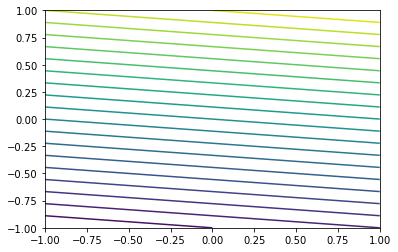

In [292]:
# Ecrire une fonction qui trace les lignes de niveaux d'un opérateur, en l'appliquant à des vecteurs de taille 2.
def lignes_niveaux(opérateur, x1_min, x1_max, x2_min, x2_max, nb_points = 200, nb_ligne=20):
    x1 = np.linspace(x1_min, x1_max, nb_points)
    x2 = np.linspace(x2_min, x2_max, nb_points)
    X1, X2 = np.meshgrid(x1, x2)
    X = np.array([X1, X2])
    Z = np.zeros((nb_points, nb_points))
    for i in range(nb_points):
        for j in range(nb_points):
            Z[i,j] = opérateur([X1[i, j],X2[i, j]])
    plt.contour(X1, X2, Z, nb_ligne)

lignes_niveaux(lambda x: moyenne_pondérée(x, poids), -1, 1, -1, 1)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule un OWA d'un vecteur <code>x</code> en fonction d'un vecteur <code>poids</code>
</div>

In [293]:
def OWA(x, w):
    return np.sort(x) @ w

1.9000000000000001


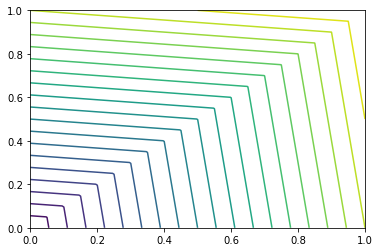

In [294]:
poids = np.array ([1/10, 9/10])
x = np.array( [1, 2])
print(OWA(x, poids))
lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes configurations des moyennes pondérées et des OWA pour différents vecteurs de poids.    
</div>

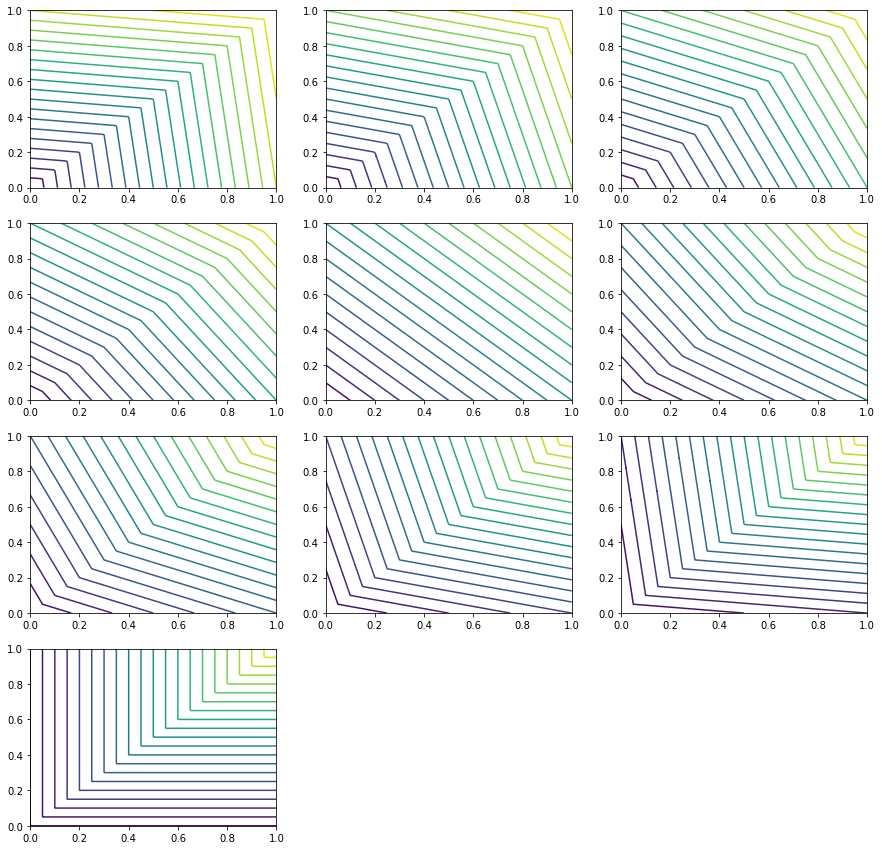

In [295]:
plt.figure(figsize=(15, 15))
for i in range (1, 11):
    plt.subplot(4, 3, i )
    poids = np.array ([i/10, 1-i/10])
    lignes_niveaux(lambda x: OWA(x, poids), 0, 1, 0, 1)
plt.show()

<div class="alert alert-block alert-info">
    Visualiser aussi les lignes de niveaux des opérateurs conjonctifs et disjonctifs vus en cours, ainsi que l'opérateur à comportement variable (intégrale de Gödel), après avoir défini les fonctions permettant de calculer ces opérateurs.
</div>

In [296]:
#conjonctif
def min_conj(u,v):
    return np.minimum(u,v)
def max_conj(u,v):
    return max(u+v-1,0)
def mult(u,v):
    return u*v


#disjonctif
def max_dis(u,v):
    return np.maximum(u,v)
def plus_mul(u,v):
    return u+v-u*v
def min_dis(u,v):
    return min(u+v,1)

# compromis
def moyenne(x):
    return np.sum(x)/len(x)


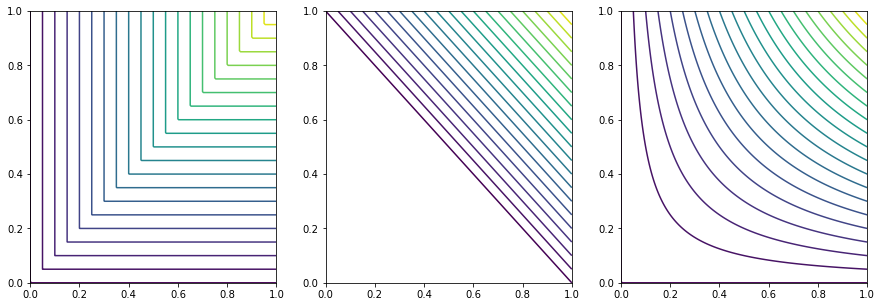

In [297]:
#conjonctif
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: min_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: max_conj(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: mult(*x), 0, 1, 0, 1)

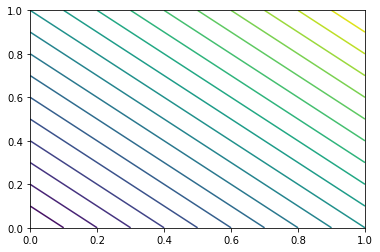

In [298]:
#compromis
lignes_niveaux(lambda x: moyenne(x), 0, 1, 0, 1)

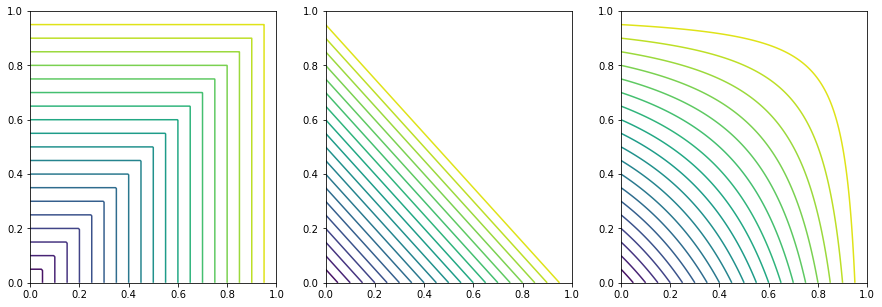

In [299]:
# disjonctif
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1 )
lignes_niveaux(lambda x: max_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 2 )
lignes_niveaux(lambda x: min_dis(*x), 0, 1, 0, 1)
plt.subplot(1, 3, 3 )
lignes_niveaux(lambda x: plus_mul(*x), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Ecrire une fonction qui calcule l'intégrale de Choquet d'un vecteur <code>x</code> en fonction d'une capacité <code>mu</code>.<br>
    La fonction ne doit pas imposer de restriction au nombre de composantes de <code>x</code>, sa documentation doit expliciter la représentation choisie pour <code>mu</code>, la fonction doit inclure une vérification que <code>mu</code> satisfait les propriétés d'une capacité.
    
</div>

**verification capacité de mu**

In [316]:
def verif_mu(x, mu):
    '''vérification que mu satisfait les propriétés d'une capacité

    mu: Un dictionnaire de frozenset représentant la capacité de Choquet
    x : Le vecteur d'entrée
    return bool : True si mu satisfait les propriétés d'une capacité
    '''
    # Borne sup et borne inf
    sigma = np.argsort(x)
    assert mu[frozenset(sigma)] == 1, "borne sup de mu doit être égale à 1"
    assert mu[frozenset([])] == 0, "borne inf de mu doit être égale à 0"

    # Monotonicité
    mono = ({}) 
    for k in mu.keys():
        val_max = mono.get(len(k), 0)
        if val_max < mu[k]:
            val_max = mu[k]
        mono[len(k)] = val_max
    try:
        for i in range(1, len(sigma)):
            assert mono[i - 1] < mono[i], "Problème de monotonicité pour mu"
    except KeyError:
        raise KeyError("Valaur manquante dans mu")
    return True

In [317]:
x = np.array([1, 2])
mu = {
    frozenset([0, 1]): 1, 
    frozenset([1]): 0.9,
    frozenset([0]): 0.5,  
    frozenset([]): 0,
}

try:
    print(mu , verif_mu(x,mu))
except AssertionError as error:
    print(mu, error)

mu = {
    frozenset([0, 1]): 0.9, 
    frozenset([1]): 0.9,
    frozenset([0]): 0.5,  
    frozenset([]): 0,
}

try:
    print(mu, verif_mu(x,mu))
except AssertionError as error:
    print(mu, error)

mu = {
    frozenset([0, 1]): 1, 
    frozenset([1]): 0.9,
    frozenset([0]): 0.5,  
    frozenset([]): 0.5,
}

try:
    print(mu, verif_mu(x,mu))
except AssertionError as error:
    print(mu, error)

x = np.array([1, 2, 3])
mu = {
    frozenset([0, 1, 2]): 1,
    frozenset([0, 1]): 0.4,
    frozenset([0, 2]): 0.4,
    frozenset([1, 2]): 0.4,
    frozenset([0]): 0.1,
    frozenset([1]): 0.1,
    frozenset([2]): 0.5,
    frozenset([]): 0,
}
try:
    print(mu, verif_mu(x,mu))
except AssertionError as error:
    print(mu, error)

{frozenset({0, 1}): 1, frozenset({1}): 0.9, frozenset({0}): 0.5, frozenset(): 0} True
{frozenset({0, 1}): 0.9, frozenset({1}): 0.9, frozenset({0}): 0.5, frozenset(): 0} borne sup de mu doit être égale à 1
{frozenset({0, 1}): 1, frozenset({1}): 0.9, frozenset({0}): 0.5, frozenset(): 0.5} borne inf de mu doit être égale à 0
{frozenset({0, 1, 2}): 1, frozenset({0, 1}): 0.4, frozenset({0, 2}): 0.4, frozenset({1, 2}): 0.4, frozenset({0}): 0.1, frozenset({1}): 0.1, frozenset({2}): 0.5, frozenset(): 0} Problème de monotonicité pour mu


1 er essai ne donnant pas le bon résultat mais plus compliqué car mu etait une liste et pas un dictionnaire de frozenset

In [332]:
import itertools
def choquet(x,mu):
    sigma = x.argsort()
    sigma2 = list(sigma.copy())
    sig=[]
    for i in reversed(range(len(x))):
        sig.append(frozenset(sigma2))
        sigma2.pop()
    sig.append(frozenset(()))

    c=[]
    for i in range(0, len(x)+1):
        combinations = itertools.combinations(sigma, i)
        for combination in combinations:
            c.append(frozenset(combination))
    mu_dic = {subset: n for subset, n in zip(c, mu)}

    choc = 0
    for i in range(len(x)):
        choc += np.subtract(mu_dic[sig[i]],mu_dic[sig[i+1]]) * x[sigma[i]]
    return choc

x = np.array([1.2])
mu = [0,0.5,0.9,1]
print(choquet(x, mu))

0.6


Avec un peu d'aide et en utilisant un dictionnaire de frozenset pour mu la fonction est beaucoup plus simple

In [333]:
def choquet(x, mu):
    """Calcule l'intégrale de Choquet pour x selon une capacité de Choquet mu

    x : Le vecteur d'entrée
    mu : Un dictionnaire de frozenset représentant la capacité de Choquet
    return float : La valeur de l'intégrale de Choquet.
    """
    assert verif_mu(x, mu)

    arg = np.argsort(x)
    choquet = 0
    for i in range(len(x)):
        choquet += (mu[frozenset(arg[i:])] - mu[frozenset(arg[i + 1 :])]) * x[arg[i]]
    return choquet

<div class="alert alert-block alert-info">
    Visualiser les lignes de niveaux de différentes intégrales de Choquet, pour différentes valeurs des paramètres. 
</div>

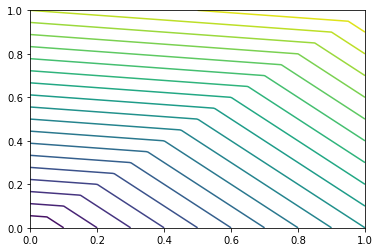

In [334]:
mu = {
    frozenset([0, 1]): 1, 
    frozenset([1]): 0.9,
    frozenset([0]): 0.5,  
    frozenset([]): 0,
}
lignes_niveaux(lambda x: choquet(np.array([*x]), mu = mu), 0, 1, 0, 1)

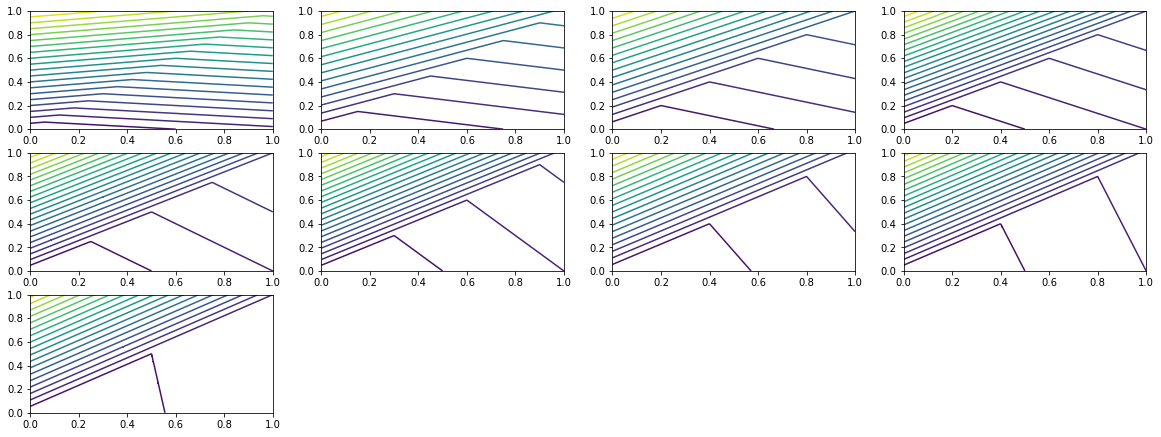

In [335]:
plt.figure(figsize=(20,10))
for i in range(1,10):
    plt.subplot(4, 4, i )
    mu = {frozenset([]): 0,frozenset([0]): i/10 , frozenset([1]): i+2/10, frozenset([0, 1]): 1 }
    lignes_niveaux(lambda x: choquet(np.array([*x]),mu = mu), 0, 1, 0, 1)

<div class="alert alert-block alert-info">
    Commenter les résultats obtenus. 
</div>

<div>
</div>

## B - LIME

<div class="alert alert-block alert-warning">
L'objet de cette 2ème partie de TME est de tester l'algorithme LIME sur une tâche de classification assez simple.
</div>

## 1 - Préparation du dataset


<div class="alert alert-block alert-warning">
    Nous allons utiliser les datasets <code>half-moons</code>, que vous savez manipuler, pour permettre la visualisation des résultats et <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI ML Breast Cancer Wisconsin (Diagnostic)</a> qui comporte plus d'attributs.
</div>

<div class="alert alert-block alert-info">
    Tout d'abord, exécuter le bloc ci-dessous pour importer la bibliothèque <code>datasets</code> de <code>sklearn</code>.
</div>

In [338]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

<div class="alert alert-block alert-info">
    Exécuter le bloc suivant pour charger les données <code>breast_cancer</code>.
 </div>

In [339]:
breast_cancer = datasets.load_breast_cancer()

<div class = "alert alert-block alert-info">
    Q1.1 - Visualiser le contenu de la variable <code>breast_cancer</code>.
</div>

In [340]:
print(breast_cancer)
print(breast_cancer.keys())
print(breast_cancer['feature_names'])

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

<div class = "alert alert-block alert-info">
    Q1.2 - Définir les variables <code>X_train, X_test, y_train, y_test</code> avec <code>train_test_split</code> où vous utiliserez 25% des données pour le test.
</div>

In [341]:
X, y = datasets.load_breast_cancer(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

<div class = "alert alert-block alert-info">
    Q1.3 - Définir la variable <code>feature_names</code> contenant la liste des caractéristiques dans ce dataset ainsi que les noms de classes dans la variable <code>target_names</code>.
</div>

In [342]:
print(breast_cancer['feature_names'])
feature_names = breast_cancer['feature_names']
target_names = breast_cancer['target_names']
print(target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


## 2 - Apprentissage d'un modèle linéaire

<div class="alert alert-block alert-warning">
Nous allons apprendre la tâche de classification en utilisant un modèle de régression logistique.
</div>

<div class = "alert alert-block alert-info">
    Q2.1 - Apprendre un modèle <code>logreg</code> de régression logistique sur les données.
</div>

In [343]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

<div class = "alert alert-block alert-info">
    Q2.2 - Dans <code>y_pred</code>, calculer les prédictions sur les données de test.
</div>

In [344]:
y_pred = lr.predict(x_test)
print(y_pred)

[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]


<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>confusion_matrix</code>, donner la matrice de confusion sur les données de test.
</div>

In [345]:
#%pip install seaborn

tn 52 fp 1 fn 6 tp 84
accuracy 0.951048951048951


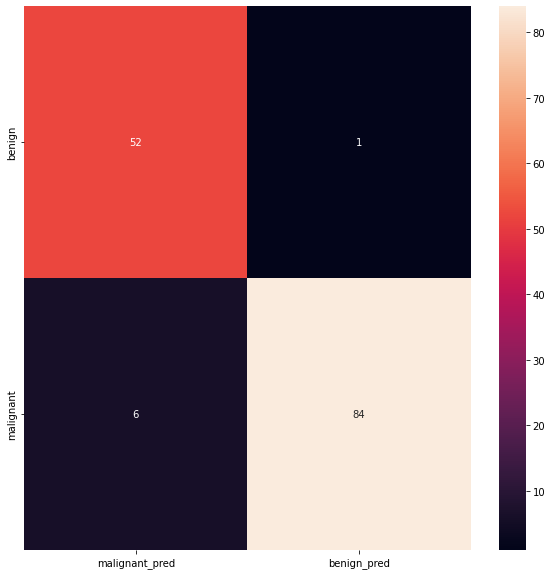

In [346]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

m = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("tn",tn,"fp",fp,"fn",fn,"tp",tp)
df_cm = pd.DataFrame(m, index = [target_names[1], target_names[0]],
                  columns = [    target_names[0]+"_pred", target_names[1]+"_pred"])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
acc = accuracy_score(y_test, y_pred)
print("accuracy",acc)

<div class = "alert alert-block alert-info">
    Q2.3 - Avec <code>f1_score</code>, calculer le score f1.
</div>

In [347]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='binary')

0.96

<div class = "alert alert-block alert-info">
    Q2.4 - En utilisant les labels des caractéristiques du dataset, dessiner un diagramme en barre de l'importance de chaque caractéristique apprise par la régression logistique.
</div>

[ 0.66190254  0.16217328 -0.14716     0.02139994 -0.14684128 -0.16898114
 -0.34826323 -0.21116346 -0.29781311 -0.02566732 -0.02490166  1.04049519
 -0.00452951 -0.10980541 -0.01271142  0.06943453 -0.00328213 -0.02284313
 -0.02966001  0.01639379  0.32333911 -0.39027003 -0.22721131 -0.01056835
 -0.25804263 -0.57382696 -1.13266698 -0.45173965 -0.64173228 -0.08110189]


<AxesSubplot:>

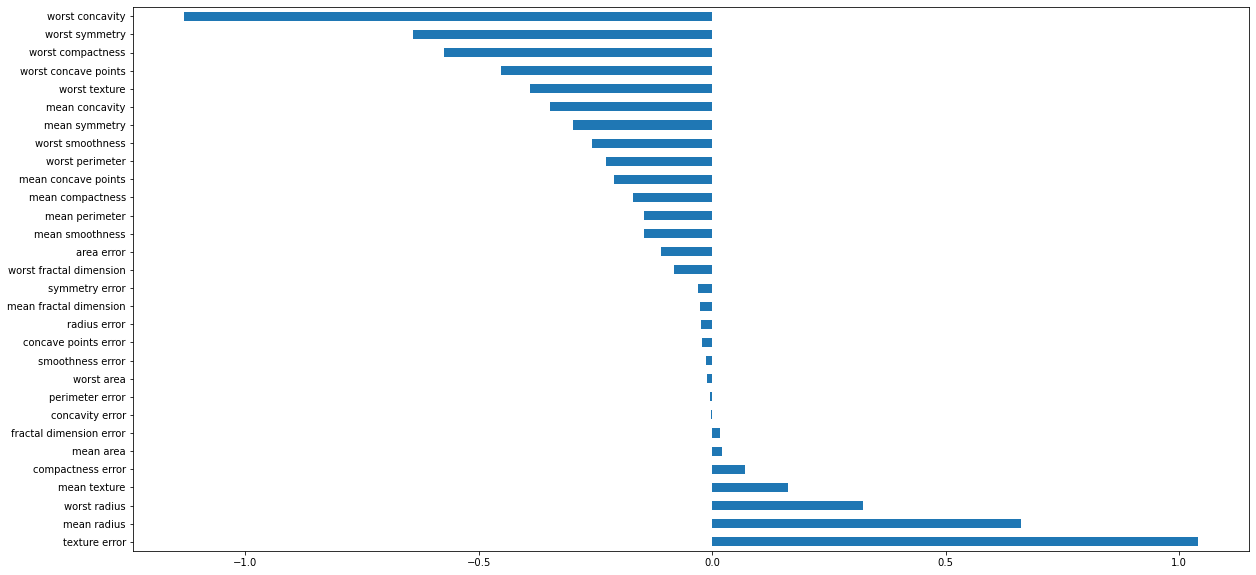

In [348]:
import pandas as pd
coefs = lr.coef_[0]
print(coefs)
plt.figure(figsize=(20,10))
pd.Series(coefs, index=feature_names).nlargest(coefs.size).plot(kind='barh')

<div class = "alert alert-block alert-info">
    Q2.5 - De la même manière, donner les importances du premier exemple de la base de test.
</div>

Importance des caractéristiques pour le premier exemple de la base de test:
mean radius: 8.8695
mean texture: 3.3278
mean perimeter: -13.0443
mean area: 11.9133
mean smoothness: -0.0162
mean compactness: -0.0248
mean concavity: -0.0503
mean concave points: -0.0173
mean symmetry: -0.0630
mean fractal dimension: -0.0019
radius error: -0.0097
texture error: 0.9683
perimeter error: -0.0140
area error: -3.6971
smoothness error: -0.0001
compactness error: 0.0016
concavity error: -0.0001
concave points error: -0.0003
symmetry error: -0.0005
fractal dimension error: 0.0001
worst radius: 5.3060
worst texture: -11.5754
worst perimeter: -25.7430
worst area: -8.9239
worst smoothness: -0.0406
worst compactness: -0.2213
worst concavity: -0.5783
worst concave points: -0.0927
worst symmetry: -0.2301
worst fractal dimension: -0.0090


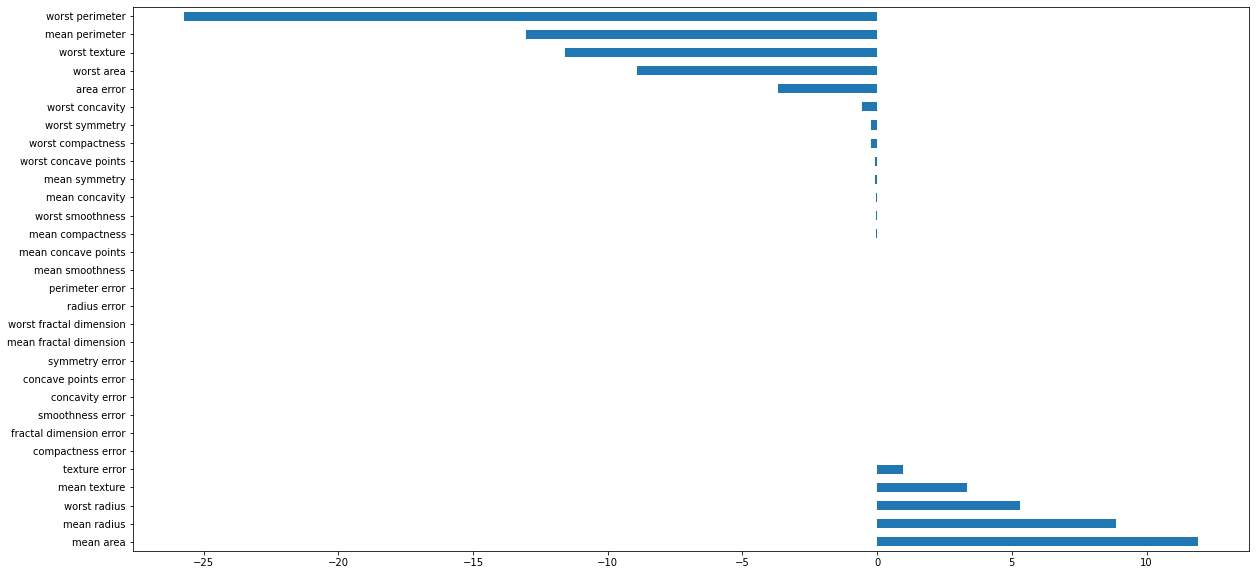

In [349]:
coefficients_ex = lr.predict_proba(x_test)[0]
print("Importance des caractéristiques pour le premier exemple de la base de test:")

coeffs = lr.coef_[0]

importances = x_test[0] * coeffs
plt.figure(figsize=(20,10))
pd.Series(importances, index=feature_names).nlargest(importances.size).plot(kind='barh')

for feature, coef in zip(feature_names, importances):
    print(f"{feature}: {coef:.4f}")

Importance des caractéristiques pour le premier exemple de la base de test:
mean radius: 8.7437
mean texture: 4.0949
mean perimeter: -12.3762
mean area: 11.5110
mean smoothness: -0.0129
mean compactness: -0.0088
mean concavity: -0.0097
mean concave points: -0.0044
mean symmetry: -0.0482
mean fractal dimension: -0.0014
radius error: -0.0052
texture error: 1.4047
perimeter error: -0.0060
area error: -1.9304
smoothness error: -0.0001
compactness error: 0.0006
concavity error: -0.0000
concave points error: -0.0001
symmetry error: -0.0004
fractal dimension error: 0.0000
worst radius: 4.6399
worst texture: -13.3589
worst perimeter: -20.7421
worst area: -6.6887
worst smoothness: -0.0333
worst compactness: -0.0610
worst concavity: -0.1574
worst concave points: -0.0271
worst symmetry: -0.1568
worst fractal dimension: -0.0055


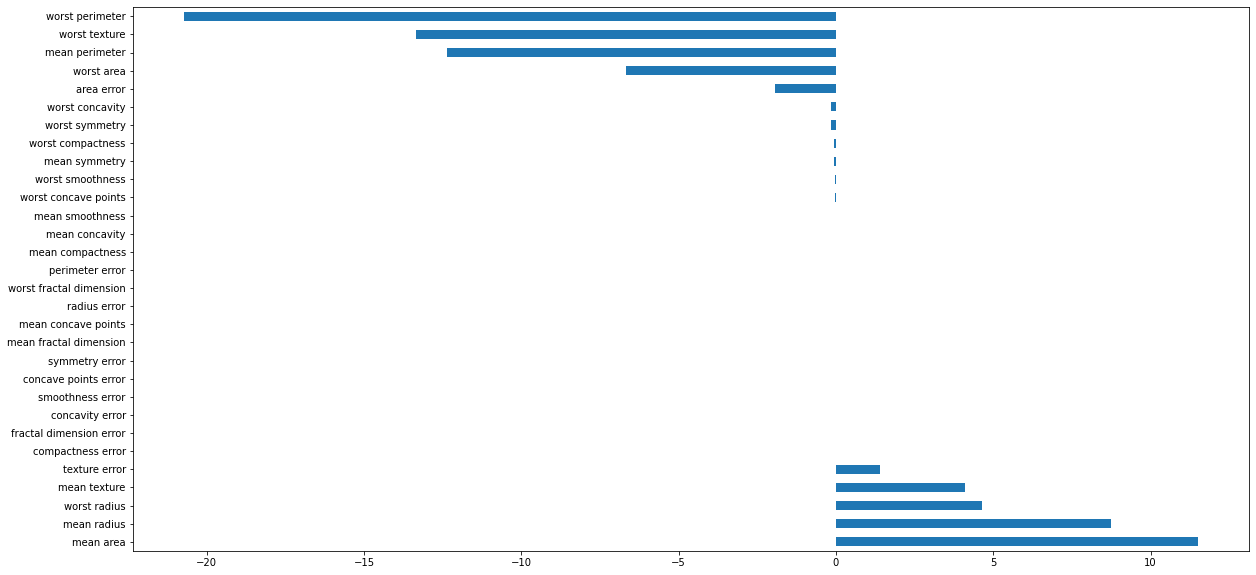

In [350]:
coefficients_ex = lr.predict_proba(x_test)[1]
print("Importance des caractéristiques pour le premier exemple de la base de test:")

coeffs = lr.coef_[0]

importances = x_test[1] * coeffs
plt.figure(figsize=(20,10))
pd.Series(importances, index=feature_names).nlargest(importances.size).plot(kind='barh')

for feature, coef in zip(feature_names, importances):
    print(f"{feature}: {coef:.4f}")

## 3 - Explication avec LIME

<div class="alert alert-block alert-warning">
Nous allons étudier une explication donnée par LIME.
</div>

<div class = "alert alert-block alert-info">
    Q3.1 - Exécuter le bloc ci-dessous pour obtenir une explication sur le premier exemple de la base de test. Commentez.
</div>

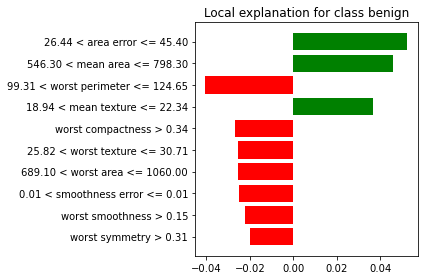

In [351]:
from lime.lime_tabular import LimeTabularExplainer
explainer = LimeTabularExplainer(x_test,
    feature_names=feature_names,
    class_names=target_names,
    categorical_features=[],
    mode='classification')


exp = explainer.explain_instance(x_test[0], lr.predict_proba, num_features=10)
exp.as_pyplot_figure()
plt.tight_layout()

Dans les explication locale de LIME pour la classe bénine, on voit que les caractéristiques les plus importantes pour l'explication correspondent pour la plupart aux importances du premier exemple de la base de test sauf pour fractal dimension error qui était ne semblait pas avoir d'importance dans la décision. De meme worst concavity semblait n'avoir que peu d'importance dans la décision contrairement à son poids dans Lime.

<div class = "alert alert-block alert-info">
    Q3.2 - Comparer avec l'exemple suivant de la base de test.
</div>

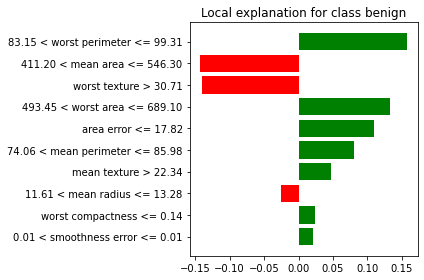

In [352]:
exp = explainer.explain_instance(x_test[1], lr.predict_proba, num_features=10)

exp.as_pyplot_figure()
plt.tight_layout()

On voit que certaines variables comme worst perimeter , mean area, mean perimeter ont un role explicatif opposé dans la probabilité de prédire la classe bénine. Certaines veriables qui n'avait que peut de role dans la décision (non présente dans les 10 variables les plus importantes du 1er exemple) ont pour cet exemple une importance plus élevée (ex: area error)

## 4 - Expérimentations

<div class="alert alert-block alert-info">
    Faire des tests pour examiner le comportement de LIME, par exemple pour examiner sa stabilité par rapport à la donné d'intérêt ou par rapport au classifieur, selon un protocole que vous définirez après avoir spécifié l'étude que vous souhaitez mener.
</div>

[('25.82 < worst texture <= 30.71', -0.047331796626991204), ('99.31 < worst perimeter <= 124.65', -0.041441248950324784), ('85.98 < mean perimeter <= 104.20', -0.03805358468546345), ('0.02 < compactness error <= 0.03', -0.03495002338107634), ('worst concavity > 0.39', -0.031228770144326918), ('546.30 < mean area <= 798.30', 0.0301547801904253), ('26.44 < area error <= 45.40', 0.027494103156109836), ('worst concave points > 0.16', -0.027189427892110672), ('18.94 < mean texture <= 22.34', 0.02463730924085195), ('0.01 < concave points error <= 0.02', -0.022999840619522233)]


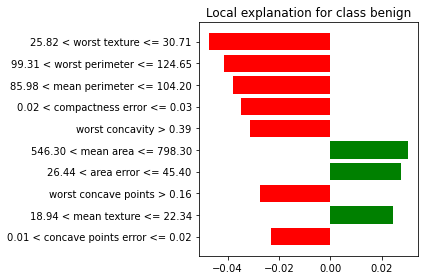

In [354]:
exp = explainer.explain_instance(x_test[0], lr.predict_proba, num_features=10)
print(exp.as_list())
exp.as_pyplot_figure()
plt.tight_layout()

accuracy lr 0.951048951048951
accuracy svm 0.9370629370629371
accuracy rf 0.972027972027972
exp_lr_sain
[('99.31 < worst perimeter <= 124.65', -0.05464102839492749), ('0.02 < symmetry error <= 0.02', 0.046068378083623865), ('546.30 < mean area <= 798.30', 0.045879303167600395), ('13.28 < mean radius <= 16.02', 0.041354476422680524), ('0.02 < compactness error <= 0.03', -0.03652264335709264), ('mean fractal dimension > 0.07', -0.03078416065540272), ('26.44 < area error <= 45.40', 0.029001649343859553), ('2.47 < perimeter error <= 3.48', -0.02330482852081757), ('25.82 < worst texture <= 30.71', -0.022466742571274425), ('0.00 < fractal dimension error <= 0.00', -0.020811781655043306)]


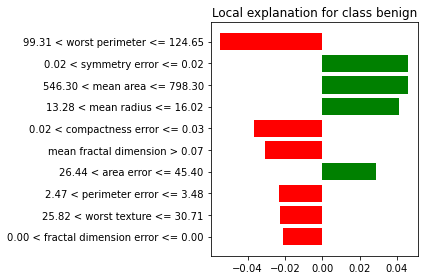

exp_lr_malade
[('83.15 < worst perimeter <= 99.31', 0.14981590281302168), ('area error <= 17.82', 0.13339820429371707), ('411.20 < mean area <= 546.30', -0.1327611087300423), ('worst texture > 30.71', -0.13082553111261058), ('493.45 < worst area <= 689.10', 0.11757170341785259), ('74.06 < mean perimeter <= 85.98', 0.05728571403452182), ('mean texture > 22.34', 0.056123838475714324), ('11.61 < mean radius <= 13.28', -0.03942385701840701), ('0.02 < mean concave points <= 0.03', -0.03055224441529643), ('symmetry error <= 0.02', -0.028510023134256157)]


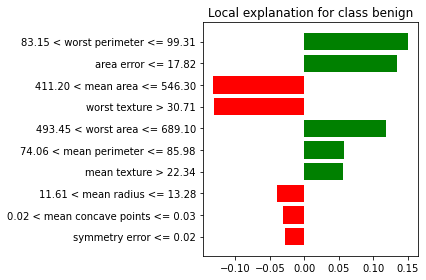

exp_svm_sain
[('689.10 < worst area <= 1060.00', -0.22825446542795205), ('546.30 < mean area <= 798.30', 0.04587823967247793), ('14.97 < worst radius <= 18.66', 0.039113877354932436), ('worst smoothness > 0.15', -0.031624408701060154), ('13.28 < mean radius <= 16.02', -0.02751747148063176), ('worst concavity > 0.39', 0.021412296216924014), ('mean compactness > 0.14', 0.02133064887188444), ('0.02 < compactness error <= 0.03', -0.015267997467949235), ('mean concave points > 0.07', -0.013887046932014976), ('mean fractal dimension > 0.07', -0.012634015758407554)]


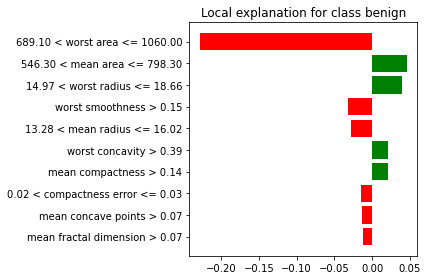

exp_svm_malade
[('493.45 < worst area <= 689.10', 0.45780049938966166), ('0.01 < concavity error <= 0.03', -0.03302072622381621), ('worst concave points <= 0.06', 0.02673912657626931), ('area error <= 17.82', 0.019183892294335456), ('0.01 < smoothness error <= 0.01', 0.016649233044745217), ('mean symmetry <= 0.16', -0.01637019365579087), ('1.09 < texture error <= 1.49', -0.015515206325468467), ('compactness error <= 0.01', -0.014745234383640017), ('0.09 < mean smoothness <= 0.09', 0.014035937809743758), ('0.03 < mean concavity <= 0.06', 0.01398814896606099)]


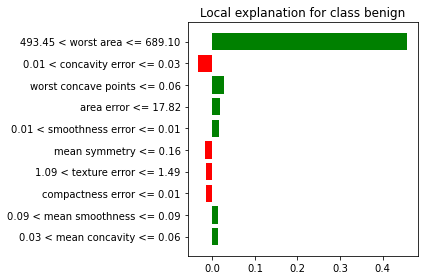

exp_rf_sain
[('worst concave points > 0.16', -0.07558948924404865), ('mean concave points > 0.07', -0.06092774619114444), ('worst concavity > 0.39', -0.04500721247197447), ('mean concavity > 0.14', -0.039055767097105516), ('worst compactness > 0.34', -0.03444572330748443), ('99.31 < worst perimeter <= 124.65', -0.03438467053176445), ('689.10 < worst area <= 1060.00', -0.030672017706001496), ('worst symmetry > 0.31', -0.02924043969991782), ('worst smoothness > 0.15', -0.022805681555419073), ('mean smoothness > 0.10', -0.01903755284965124)]


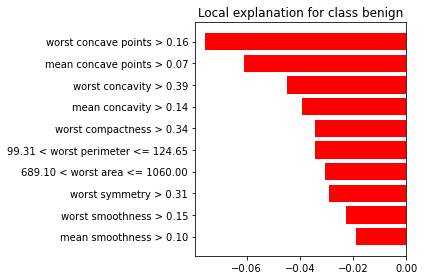

exp_rf_malade
[('83.15 < worst perimeter <= 99.31', 0.08133058746670327), ('493.45 < worst area <= 689.10', 0.07090690012374126), ('12.77 < worst radius <= 14.97', 0.0471681278299775), ('0.02 < mean concave points <= 0.03', 0.04525052393995172), ('mean texture > 22.34', -0.04458017856204483), ('worst concave points <= 0.06', 0.03994228140314116), ('worst texture > 30.71', -0.03872479551866387), ('area error <= 17.82', 0.034039758470376005), ('0.10 < worst concavity <= 0.19', 0.03023031807282056), ('worst compactness <= 0.14', 0.02477543560142273)]


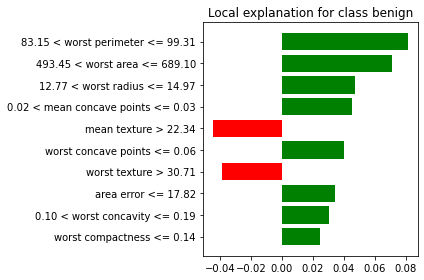

In [359]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train,y_train)

svm = SVC(kernel='rbf', probability=True)
svm.fit(x_train,y_train)

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

y_pred_lr = lr.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_rf = rf.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)

f1_lr = f1_score(y_test, y_pred_lr, average='binary')
f1_svm = f1_score(y_test, y_pred_svm, average='binary')
f1_rf = f1_score(y_test, y_pred_rf, average='binary')

print("accuracy lr",acc_lr)
print("accuracy svm",acc_svm)
print("accuracy rf",acc_rf)


X_sain = x_test[y_pred_lr==0]
X_malade = x_test[y_pred_lr==1]

print('exp_lr_sain')
exp_lr_sain = explainer.explain_instance(X_sain[0], lr.predict_proba, num_features=10)
print(exp_lr_sain.as_list())
exp_lr_sain.as_pyplot_figure()
plt.tight_layout()
plt.show()

print('exp_lr_malade')
exp_lr_malade = explainer.explain_instance(X_malade[0], lr.predict_proba, num_features=10)
print(exp_lr_malade.as_list())
exp_lr_malade.as_pyplot_figure()
plt.tight_layout()
plt.show()

print('exp_svm_sain')
exp_svm_sain = explainer.explain_instance(X_sain[0], svm.predict_proba, num_features=10)
print(exp_svm_sain.as_list())
exp_svm_sain.as_pyplot_figure()
plt.tight_layout()
plt.show()

print('exp_svm_malade')
exp_svm_malade = explainer.explain_instance(X_malade[0], svm.predict_proba, num_features=10)
print(exp_svm_malade.as_list())
exp_svm_malade.as_pyplot_figure()
plt.tight_layout()
plt.show()

print('exp_rf_sain')
exp_rf_sain = explainer.explain_instance(X_sain[0], rf.predict_proba, num_features=10)
print(exp_rf_sain.as_list())
exp_rf_sain.as_pyplot_figure()
plt.tight_layout()
plt.show()

print('exp_rf_malade')
exp_rf_malade = explainer.explain_instance(X_malade[0], rf.predict_proba, num_features=10)
print(exp_rf_malade.as_list())
exp_rf_malade.as_pyplot_figure()
plt.tight_layout()
plt.show()

In [356]:
def moy_var(X,model,num_features,nb_ex):
    caracteristique=[]
    car=[]
    d = x_test.shape[1]
    for i in range(nb_ex):
        exp = explainer.explain_instance(X[i], model.predict_proba, num_features=num_features)
        e = exp.as_list()
        for j in e:
            car.append(j[1])
        caracteristique.append(car)
    final = np.zeros((nb_ex,d))
    for i in range(len(caracteristique)):
        for j in range(len(caracteristique[i])):
            final[i][j] = caracteristique[i][j]
    return np.mean(final, axis=0),np.var(final, axis=0)

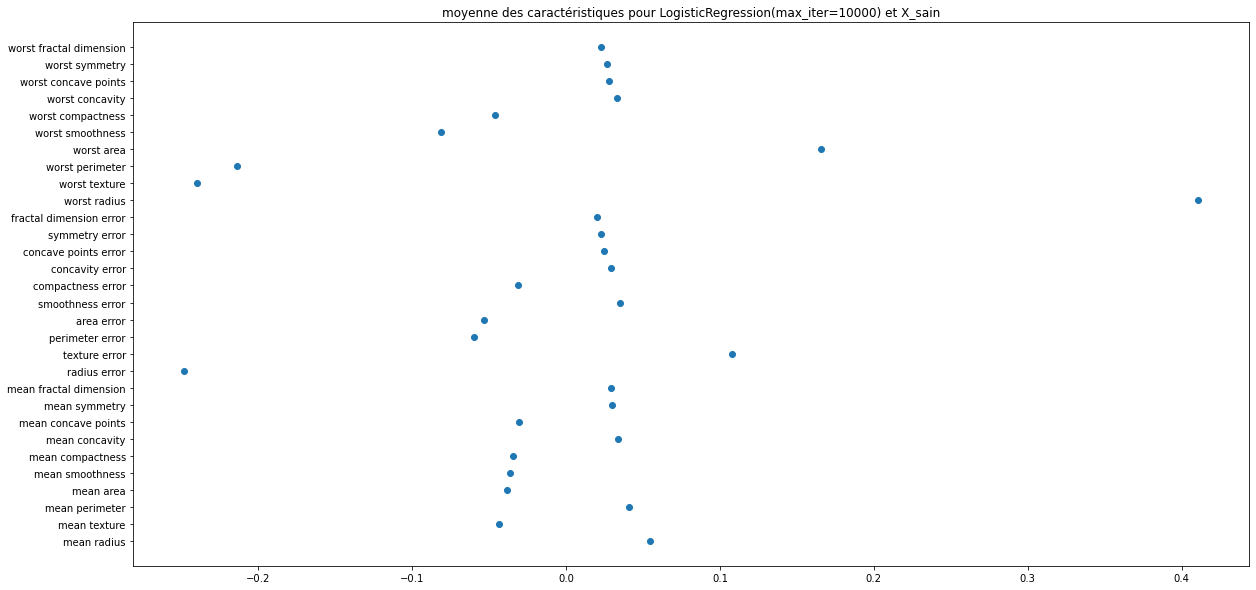

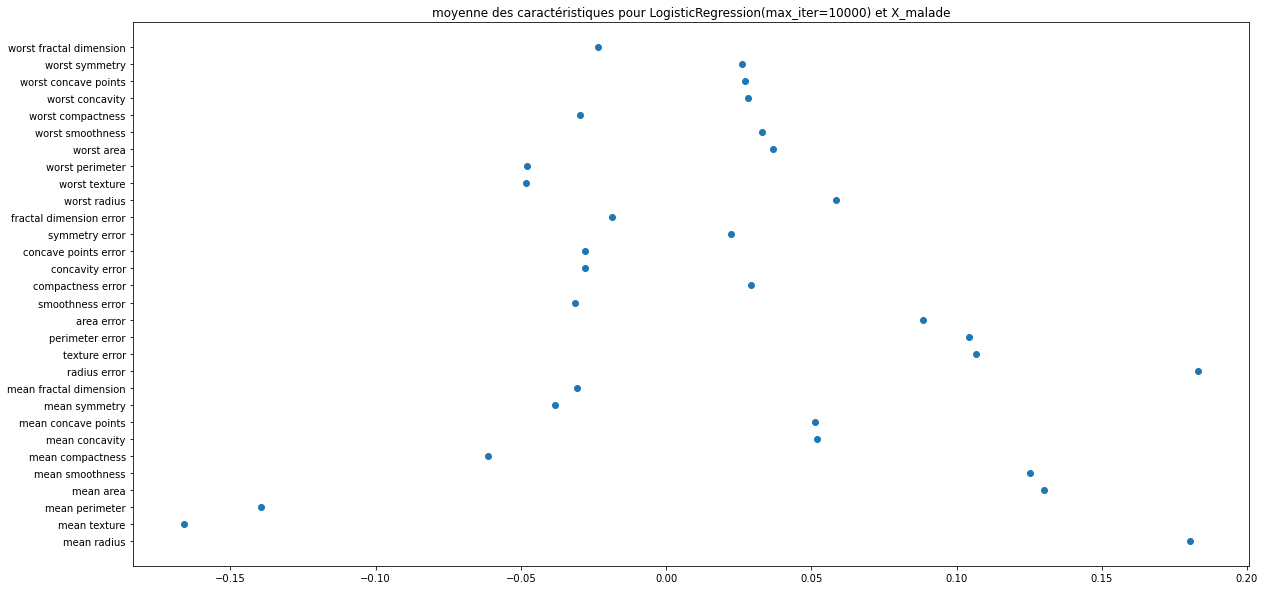

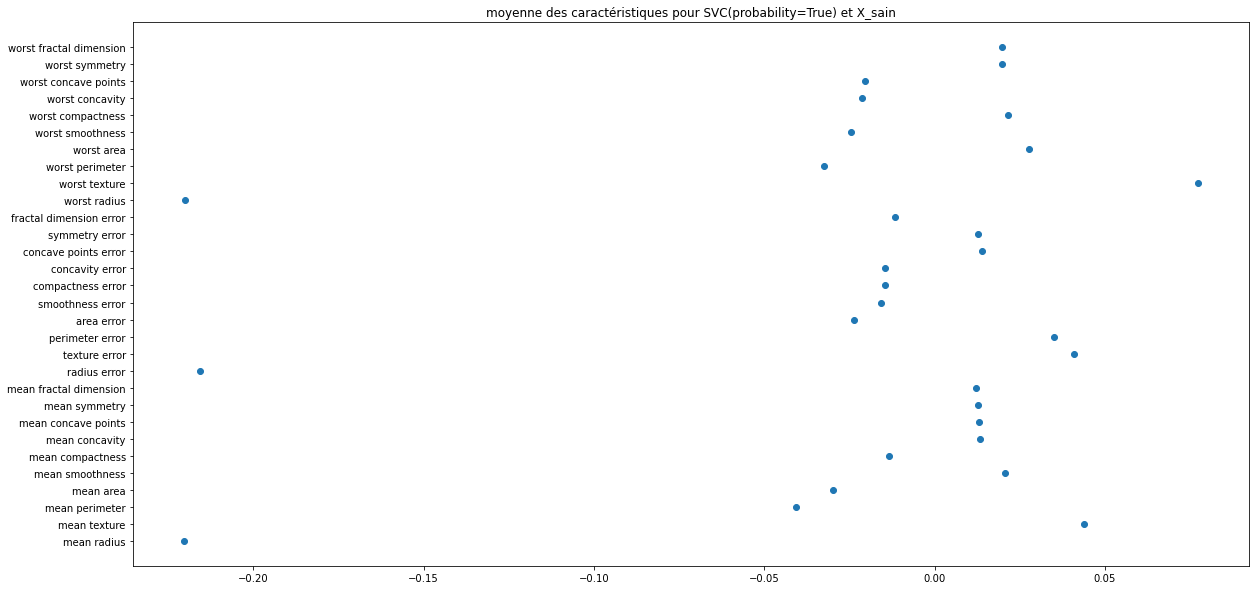

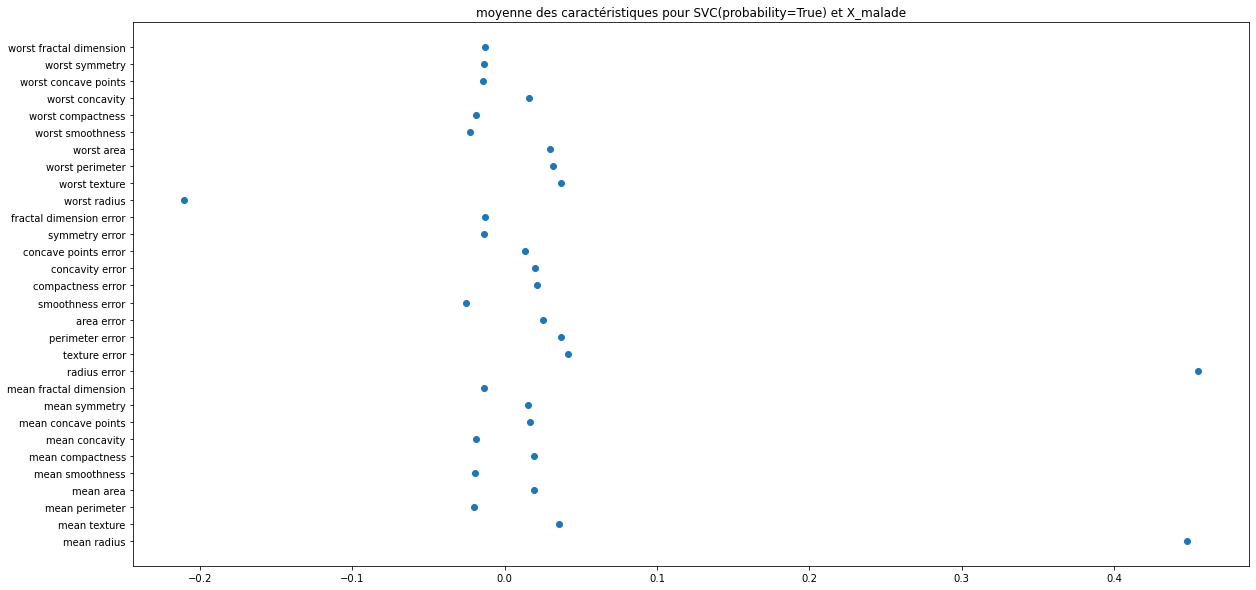

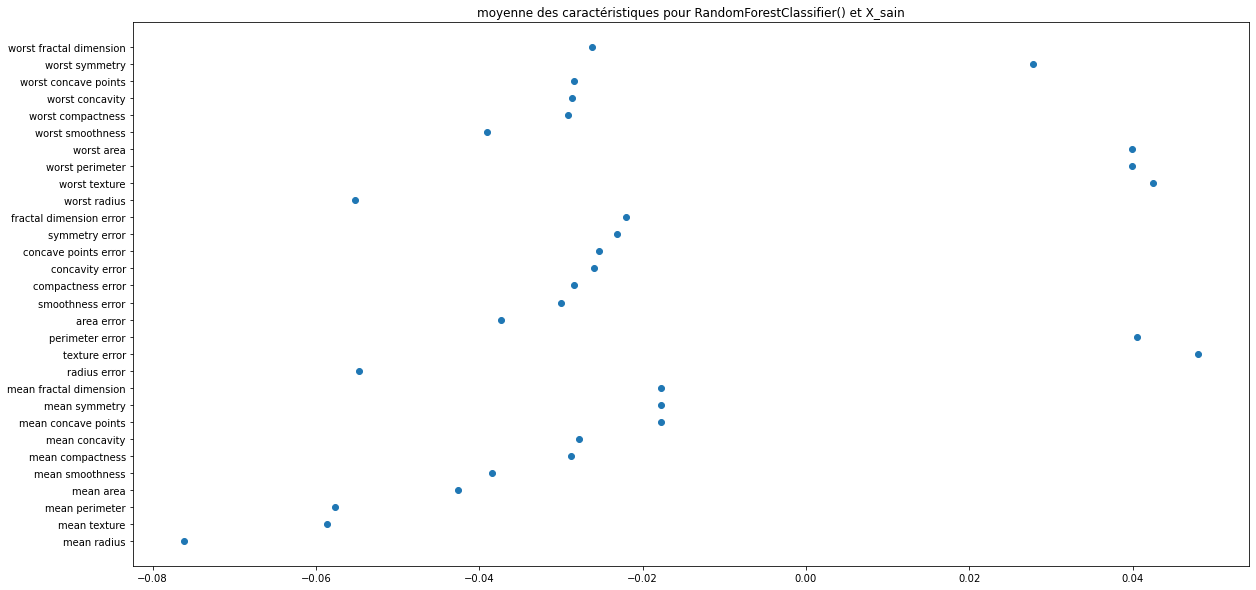

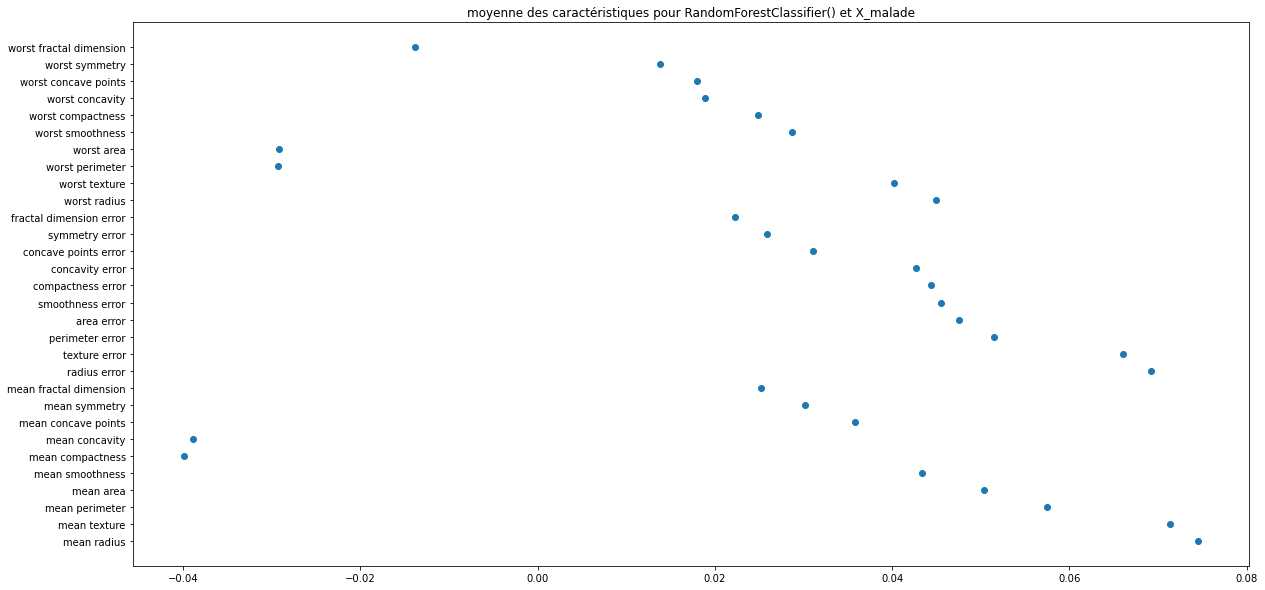

In [358]:
model = [lr,svm,rf]
echantillon = [X_sain,X_malade]
name = ['X_sain','X_malade']
for i in range(len(model)):
    h= 0
    for j in echantillon:
        m,v = moy_var(j,model[i],10,3)
        plt.figure(figsize=(20,10))
        plt.scatter(m ,feature_names)
        plt.title(f"moyenne des caractéristiques pour {str(model[i])} et {name[h%2]}")
        plt.show()
        h+=1

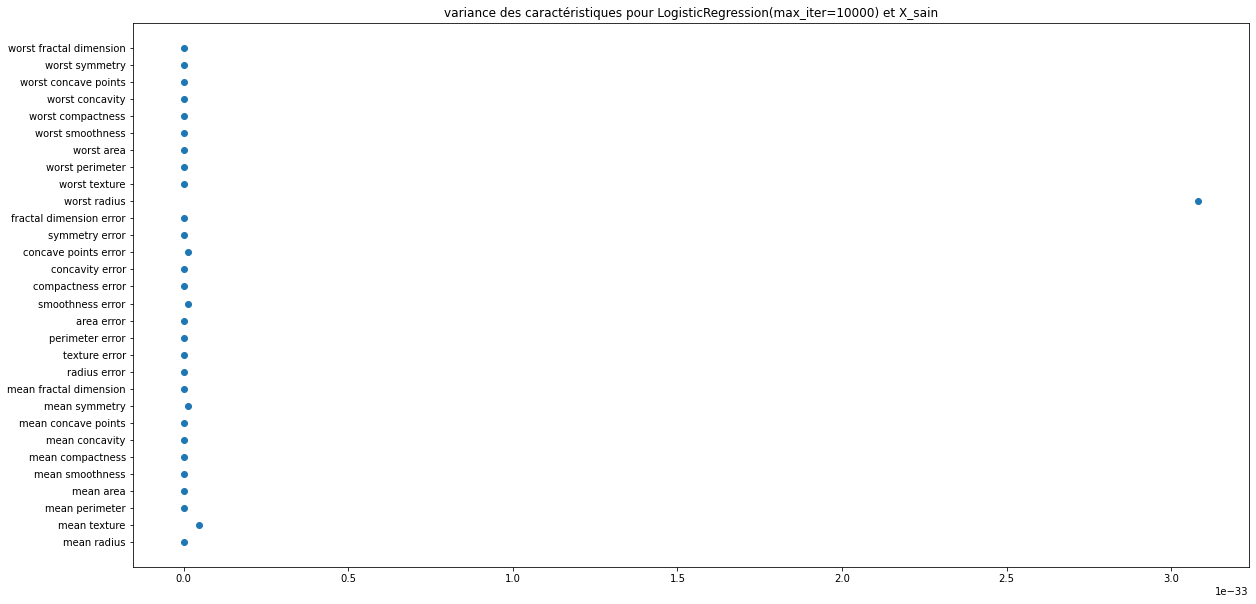

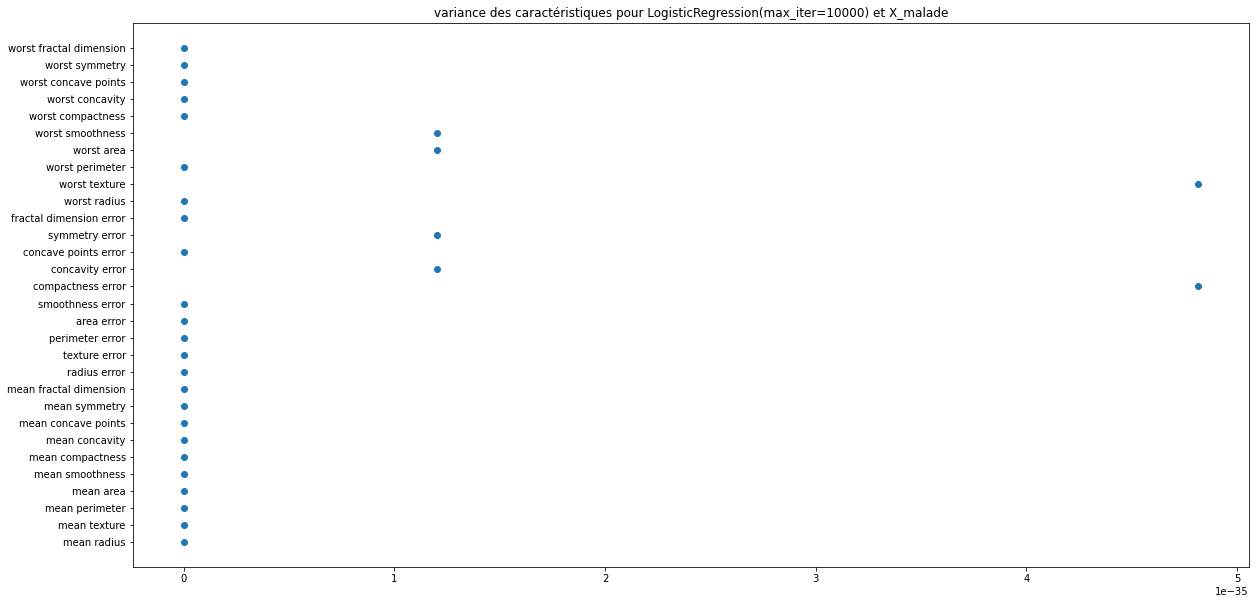

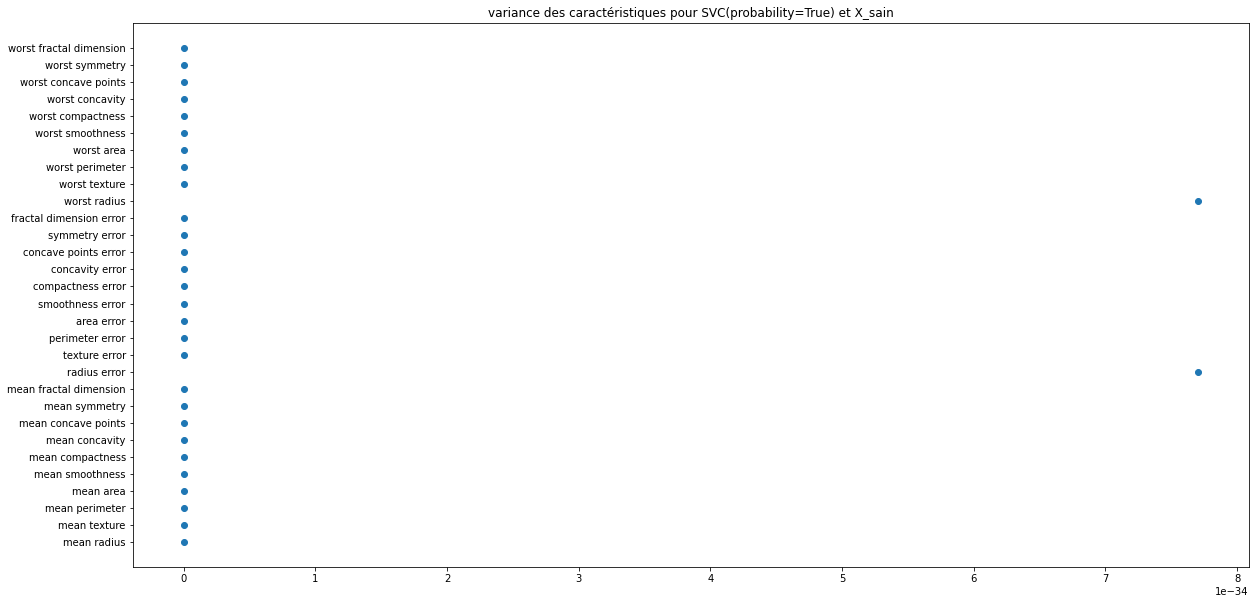

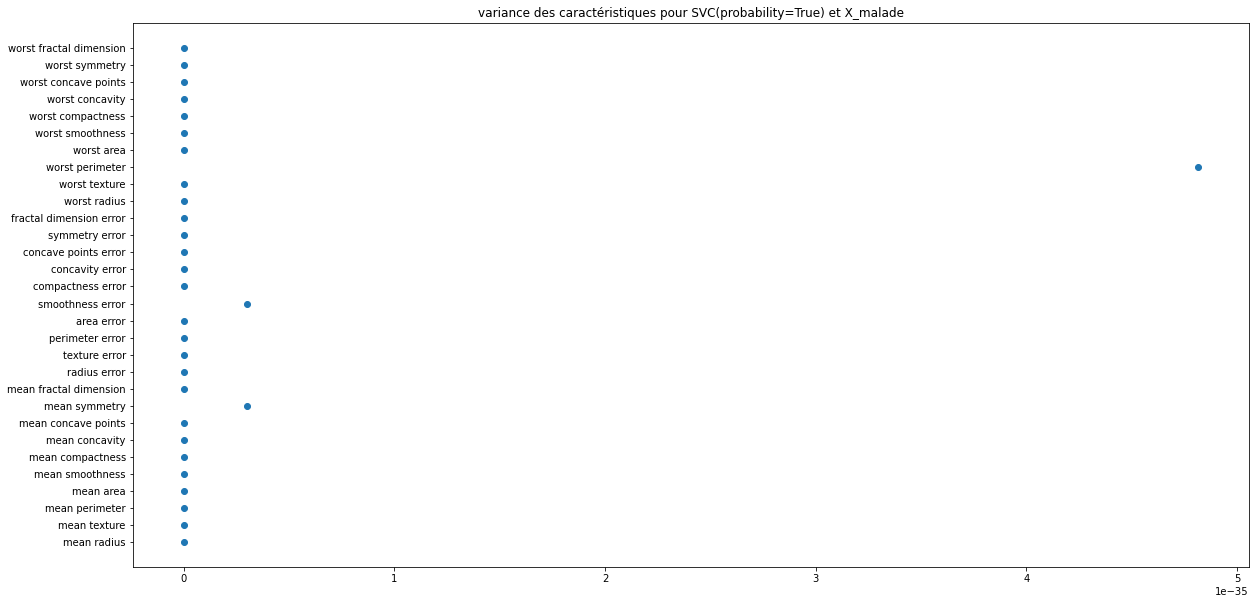

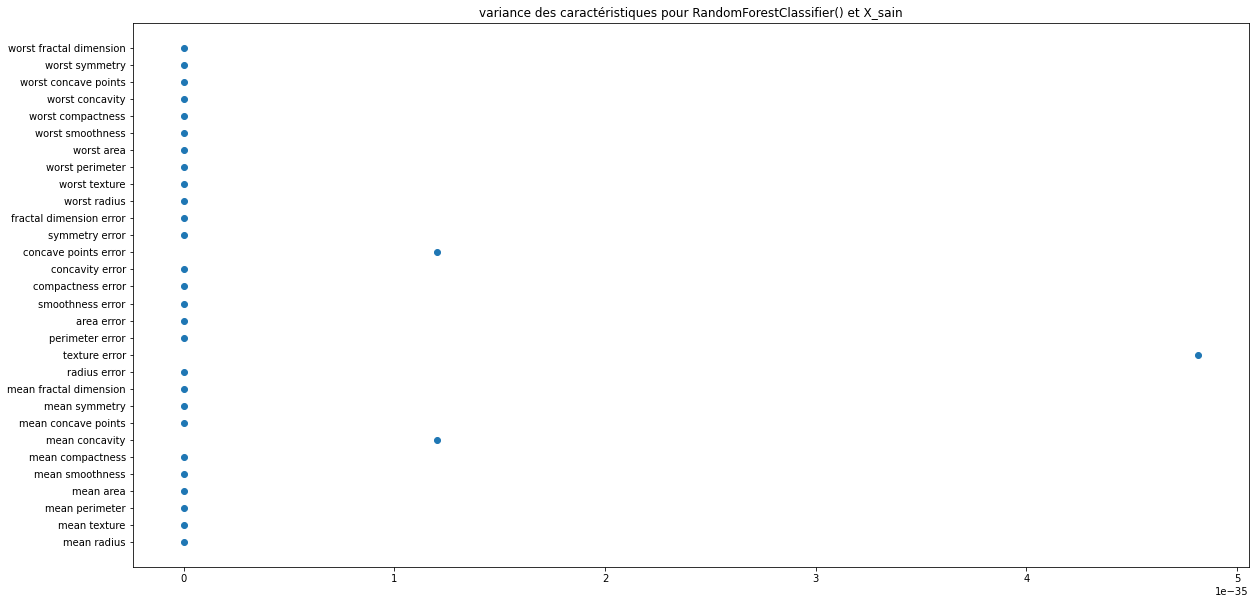

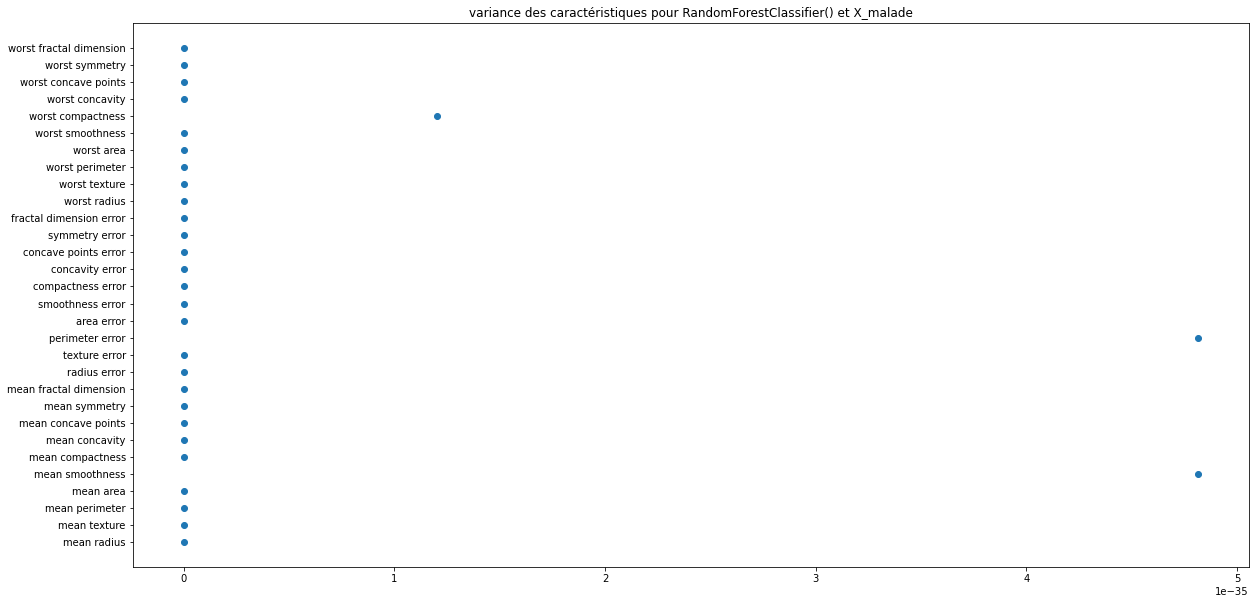

In [360]:
model = [lr,svm,rf]
echantillon = [X_sain,X_malade]
name = ['X_sain','X_malade']
for i in range(len(model)):
    h= 0
    for j in echantillon:
        m,v = moy_var(j,model[i],10,3)
        plt.figure(figsize=(20,10))
        plt.scatter(v ,feature_names)
        plt.title(f"variance des caractéristiques pour {str(model[i])} et {name[h%2]}")
        plt.show()
        h+=1

Nous avons souhaité évaluer la moyenne et la variance des explications en fonction du classifieur et de l'échantillon malade ou sain afin de voir si lime avait plus tendance à donner une explicabilité forte de certains features (peu importe l'exemple choisi) en fonction du classifieur.
Hypothèse : On souhaite voir si en moyennant les exemples d'explication locale, il est possible d'utiliser lime pour une explication globale et s'il y a explication globale est ce que cela est valable pour n'importe quel classifieur.

Les explications diffèrent en fonction du classifieur ce qui est attendu car la frontière de décision n'est pas la même.

La variance est proche de 0 sauf pour quelques features (10^-35) et il n'y a pas de différence significative entre les classifieur, ainsi les poids rendus par lime pour un classifieur et pour une population homogène (malade ou sain) semble être extrement proche peu importe l'exemple

On peut voir que pour chaque classifeur, il existe une symetrie qui était attendue entre l'echantillon malade et l'echantillon sain dans l'explicabilité des features. Ainsi ce qui est un facteur explicatif positif pour l'echantillon sain est un facteur explicatif négatif pour l'echantillon malade

Lorsque l'on regarde les moyennes des poids de chaque feature, la plupart sont proche de 0 en dehors de certains outliers qui ont plus de poids. Veux ci sont probablement important et ont donc une importance non seulement locale mais potentiellement globale. Par exemple pour la SVM dans l'echantillon malade, les poids moyens de mean radius et radius error sont de 0.45 >> aux autres poids.  
Ces resultats ne se voient par ailleurs que pour la régression logistique et la SVM mais pas pour la random forest dont les moyennes des poids sont toutes autour de 0 (<0.10) (est ce du au fait que la frontière de decision est bien plus complexe avec la random forest que les deux premières méthodes?)


**Bien que lime ne soit pas un algorithme d'explicabilité globale mais bien locale , il est peut être possible de ressortir quelques informations plus globales et celle ci pourrait être soumise à la complexité de la frontière de decision.  Bien sûr l'approche réalisée ici est empirique et mériterait plus de recherche pour démontrer une telle affirmation**

## 5 - Données textuelles

<div class="alert alert-block alert-warning">
    Nous allons apprendre un modèle de classification random forest sur les données <code>fetch_20newsgroups</code> puis utiliser LIME pour obtenir des explications sur la classification d'exemples.
</div>

**Import**

In [361]:
import scipy as sp
import copy as cp
import pandas as pd
import numpy as np
import nltk
import string
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
import sklearn.ensemble
import sklearn.metrics
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer
from sklearn.linear_model import Ridge
import seaborn as sns

**Pré_traitement**

In [362]:


newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
# making class names shorter
class_names = [x.split('.')[-1] if 'misc' not in x else '.'.join(x.split('.')[-2:]) for x in newsgroups_train.target_names]
class_names[3] = 'pc.hardware'
class_names[4] = 'mac.hardware'
print(','.join(class_names))

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]
        
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        preprocess_list.append(sentence_clean)
    
    return preprocess_list 

atheism,graphics,ms-windows.misc,pc.hardware,mac.hardware,x,misc.forsale,autos,motorcycles,baseball,hockey,crypt,electronics,med,space,christian,guns,mideast,politics.misc,religion.misc


[nltk_data] Downloading package stopwords to /home/pidoux/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/pidoux/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /home/pidoux/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pidoux/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Vectorizer**

In [363]:
preprocess_list_test = Preprocess_listofSentence(newsgroups_test.data)
preprocess_list_train = Preprocess_listofSentence(newsgroups_train.data)
vectorizer = CountVectorizer(binary= True)
train_vectors = vectorizer.fit_transform(preprocess_list_train)
test_vectors = vectorizer.transform(preprocess_list_test)

<div class = "alert alert-block alert-info">
À l'aide de la <a href="https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py">documentation du dataset fetch_20newsgroups</a>,  apprendre un modèle random forest de classification bi-classe de texte.
</div>

In [364]:
rf = RandomForestClassifier()
rf.fit(train_vectors,newsgroups_train.target)

pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='weighted')

0.7082166571312498

<div class = "alert alert-block alert-info">
Utilisez LIME pour obtenir des explications sur les prédictions obtenues sur des exemples.
    </div>

In [370]:
c = make_pipeline(vectorizer, rf)
explainer = LimeTextExplainer(class_names=class_names)
idx = 5
print('Document id: %d' % idx)
print('Predicted class =', class_names[rf.predict(test_vectors[idx]).reshape(1,-1)[0,0]])
print('True class: %s' % class_names[newsgroups_test.target[idx]])
print(f'Explanation for exemple {idx} class {class_names[rf.predict(test_vectors[idx]).reshape(1,-1)[0,0]]}')

exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=10, top_labels=1)
exp.show_in_notebook(text=True)

Document id: 5
Predicted class = med
True class: med
Explanation for exemple 5 class med
[13]


## 6 - Implémentation de LIME

<div class="alert alert-block alert-info">
    Sur des données textuelles, implémentez une version rudimentaire de LIME en utilisant la fonction de proximité proposée dans le cours. Retrouvez-vous les mêmes vecteurs d'importance qu'avec la bibliothèque LIME ?
</div>

In [133]:
def pre(x,vectorizer):
    return np.array(sp.sparse.csr_matrix.todense(vectorizer.transform([x]))).ravel()

def generate(x, nb_voisin = 1000):
    """
    Génère n exemples aléatoires proches de l'exemple x en changeant aléatoirement un nombre spécifié de dimensions binaires.
    :param x: Vecteur binaire de dimension d
    :param nb_voisin: nombre de voisin à générer
    :return: tuple (Liste de vecteurs binaires voisins, poids associés)
    """
    neighbors = []
    poids = []
    neighbor = cp.deepcopy(x)
    # liste des indices des dimensions à changer
    liste_indice = np.argwhere(x.reshape(-1) == 1)
    liste_indice = liste_indice.reshape(-1)

    # liste de nb_voisin entiers entre 1 et le nombre de dimensions à changer borné par la racine carrée du nombre de dimensions
    nb_mots_sup = np.random.randint(1, np.sqrt(len(liste_indice)), nb_voisin)
    # pour chaque nombre aleatoire de dimensions à changer, on génère un voisin
    for nb_modif in nb_mots_sup:
        neighbor = cp.deepcopy(x)
        # indices des dimensions à changer
        change_indices = np.random.choice(liste_indice, nb_modif, replace=False)
        # mettre à 0 les dimensions à changer
        neighbor[change_indices] = 0  # mettre à 0 les dimensions à changer
        neighbors.append(neighbor)
        # calcul du poids
        poids.append(1-(nb_modif/len(liste_indice)))

    return np.array(neighbors), np.array(poids)


def lime_perso(x, model, model_explicatif = Ridge(fit_intercept=True), nb_voisin = 100):
    ''' Implémentation de lime pour un exemple x donné
    :param x: Vecteur binaire de dimension d
    :param model: Modèle à expliquer
    :param model_explicatif: Modèle explicatif
    :param nb_voisin: nombre de voisin à générer
    :return: coefficients du modèle explicatif
    '''
    # Génération des voisins
    neighbors,pi_neighbors = generate(x,nb_voisin)
    # Recupération des probas des voisins
    proba_neighbors = model.predict_proba(neighbors)
    classe_x = model.predict(x.reshape(1,-1))
    pred = proba_neighbors[:,classe_x[0]]
    # Apprentissage du modèle explicatif
    model_explicatif = model_explicatif
    model_explicatif.fit(neighbors, pred, sample_weight=pi_neighbors)

    return model_explicatif.coef_

def show_result(s, names, nb=5):
    s= pd.Series(s, index=names)
    small = s.sort_values()[:nb]
    big = s.sort_values()[-nb:]
    to_plot = pd.DataFrame(pd.concat((small, big))).reset_index()
    sns.barplot(data=pd.DataFrame(to_plot).reset_index(), x=0, y="index")


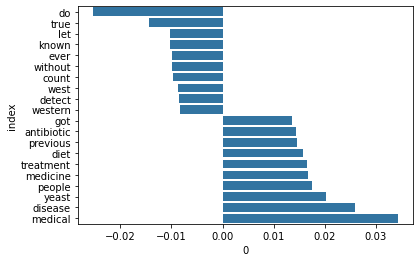

In [135]:
x = pre(newsgroups_test.data[5],vectorizer)
names = vectorizer.get_feature_names_out()
s = lime_perso(x, rf)
show_result(s, names, nb=10)


On peut voir que l'on retombe effectivement bien sur les poids attendus sachant que l'on regarde x qui est de classe medical prédite par le modèle à expliquer 